In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
housing = pd.read_csv("housing.csv")

In [106]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [107]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [108]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [109]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


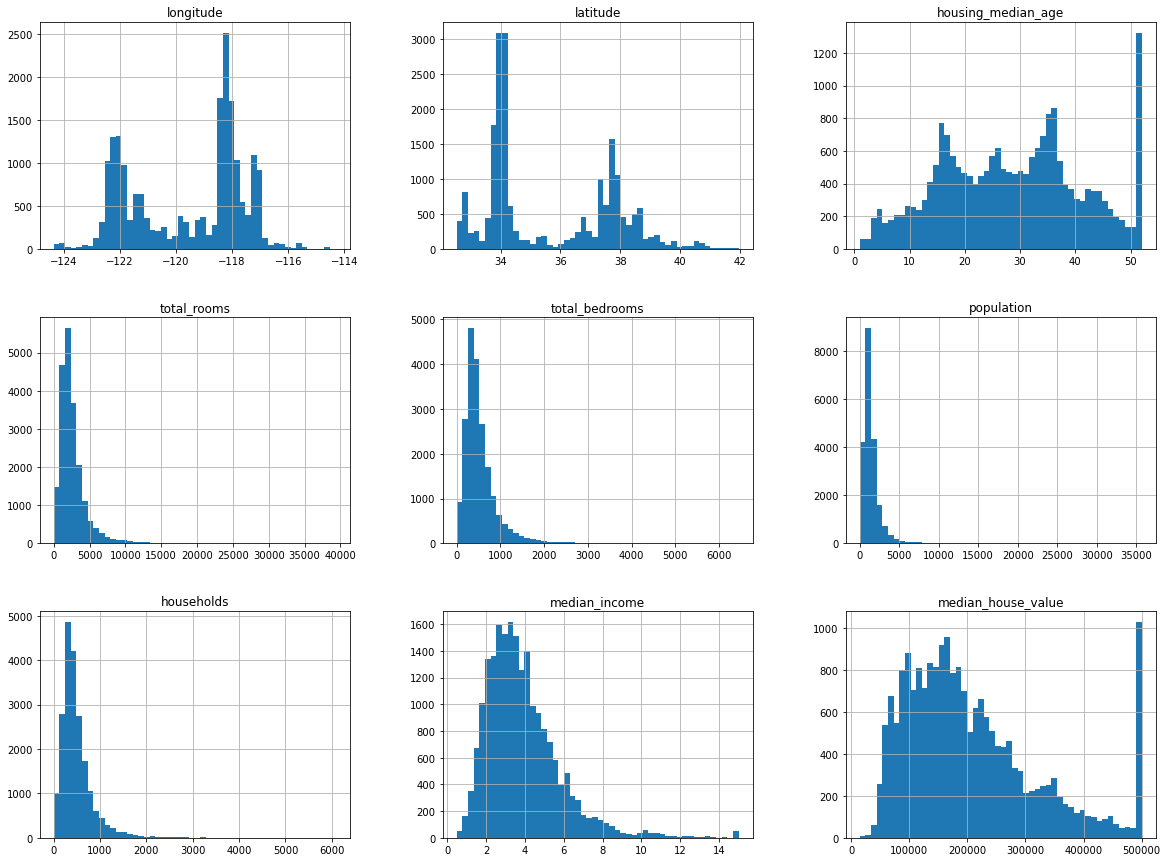

In [110]:
housing.hist(bins=50,figsize=(20,15));

In [111]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [112]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

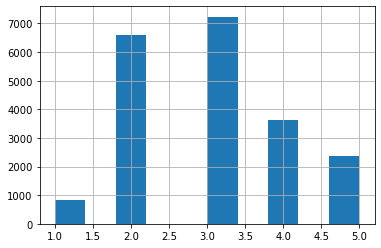

In [113]:
housing["income_cat"].hist();

In [114]:
from sklearn.model_selection import StratifiedShuffleSplit

strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in strat.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [115]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [116]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [117]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [118]:
housing = strat_train_set.copy()

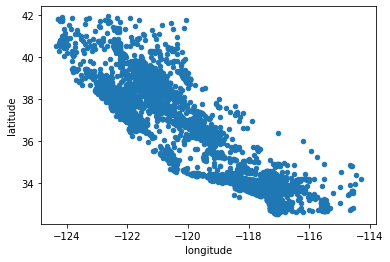

In [119]:
housing.plot(kind="scatter",x="longitude",y="latitude");

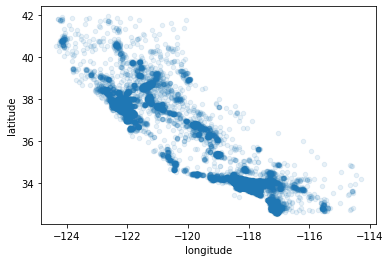

In [120]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

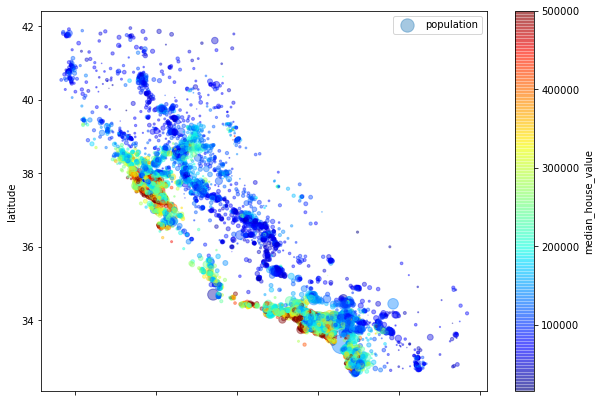

In [121]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

In [122]:
corr_matrix = housing.corr()

In [123]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

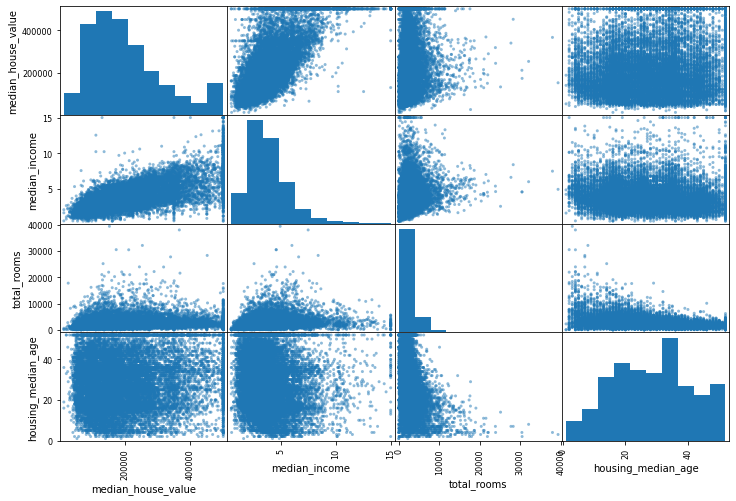

In [124]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8));

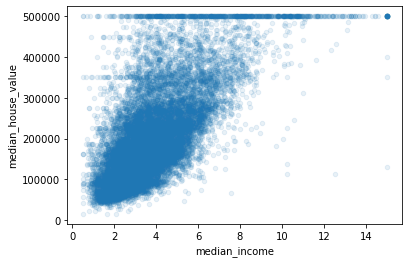

In [125]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1);

In [126]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [127]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

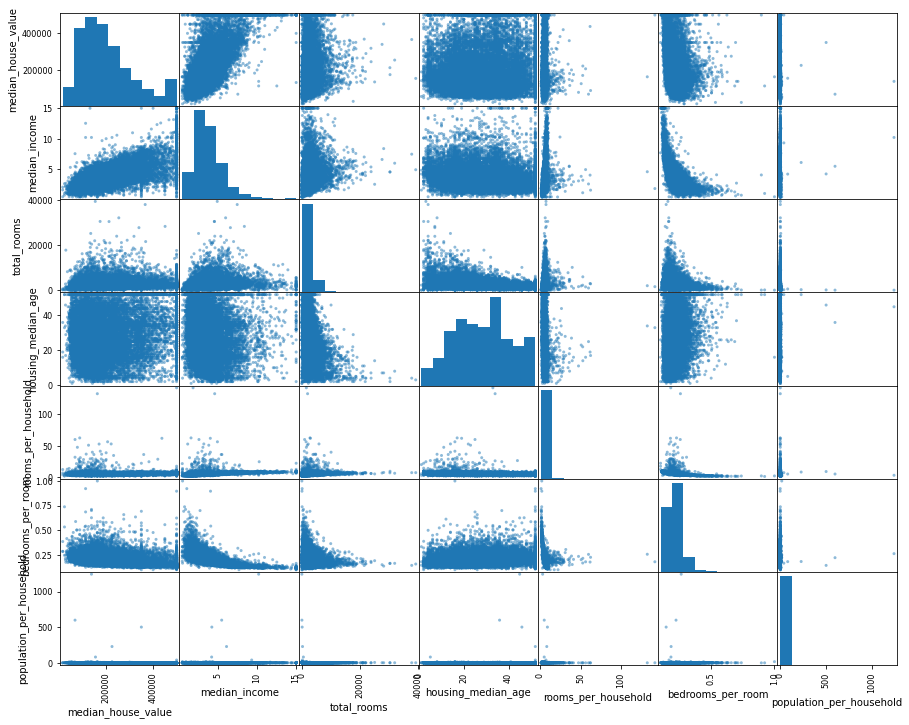

In [130]:
attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age", "rooms_per_household", "bedrooms_per_room", "population_per_household"]
scatter_matrix(housing[attributes], figsize=(15,12));

In [131]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Handle Missing Values

In [132]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [133]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [134]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [135]:
X = imputer.transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [136]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [137]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [138]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [139]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [140]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [141]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [142]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [143]:
np.c_[:]

array([], shape=(0, 1), dtype=int32)

In [102]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.505810,0.231341,3.047847


In [101]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'],
      dtype='object')

In [154]:
from sklearn.base import  BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix]
        population_per_household = X[:, population_ix]/X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [155]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [156]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        0.4528061224489796],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        0.45066273932253315],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        0.47950819672131145],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        0.4321318228630278],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        0.6918367346938775],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        0.410016155088853]], dtype=object)

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [158]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [159]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [160]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [161]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [162]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

# Train a Model

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>,
        <AxesSubplot:xlabel='5', ylabel='0'>,
        <AxesSubplot:xlabel='6', ylabel='0'>,
        <AxesSubplot:xlabel='7', ylabel='0'>,
        <AxesSubplot:xlabel='8', ylabel='0'>,
        <AxesSubplot:xlabel='9', ylabel='0'>,
        <AxesSubplot:xlabel='10', ylabel='0'>,
        <AxesSubplot:xlabel='11', ylabel='0'>,
        <AxesSubplot:xlabel='12', ylabel='0'>,
        <AxesSubplot:xlabel='13', ylabel='0'>,
        <AxesSubplot:xlabel='14', ylabel='0'>,
        <AxesSubplot:xlabel='15', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>,
        <AxesSubplot:xlabel='4', ylabel='1'>,
        <AxesSubplot:xlabel

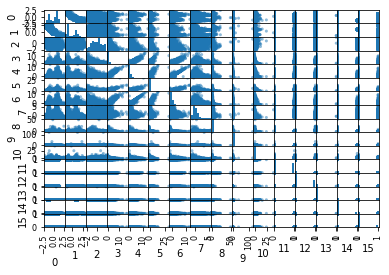

In [167]:
scatter_matrix(pd.DataFrame(housing_prepared))

In [168]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [169]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions :", lin_reg.predict(some_data_prepared))

predictions : [210571.67784293 317806.4857003  210871.7378322   59269.19941601
 189874.05336438]


In [170]:
print("Labels :", list(some_labels))

Labels : [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [171]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68634.32383858375

In [173]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [174]:
tree_mse

0.0

In [175]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([67890.70061913, 66599.76940494, 71784.51346404, 67100.83467324,
       70394.40237211, 73804.96673178, 67560.55260552, 67021.94140426,
       71169.6205992 , 70173.291611  ])

In [177]:
def display_scores(scores):
    print("Scores :", scores)
    print("Meann :", scores.mean())
    print("Standard Deviation :", scores.std())

display_scores(tree_rmse_scores)

Scores : [67890.70061913 66599.76940494 71784.51346404 67100.83467324
 70394.40237211 73804.96673178 67560.55260552 67021.94140426
 71169.6205992  70173.291611  ]
Meann : 69350.05934852213
Standard Deviation : 2328.6742010880566


In [179]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_reg_rmse_scores)

Scores : [66780.34721656 66939.4436275  70376.42645215 74608.85104129
 68039.2954916  71194.88759626 64971.01990008 68283.76599229
 72021.62218852 67668.37875892]
Meann : 69088.40382651686
Standard Deviation : 2753.8687468957733


In [182]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_rmse_scores)

Scores : [49250.43270868 46776.87370167 49032.15979503 50480.91852262
 48021.91499943 52474.91751664 46782.57427083 48598.44398433
 51233.27003102 48661.05576837]
Meann : 49131.25612986276
Standard Deviation : 1738.9417363503233


In [183]:
forest_reg.fit(housing_prepared, housing_labels)
for_mse = mean_squared_error(housing_labels, forest_reg.predict(housing_prepared))
for_rmse = np.sqrt(for_mse)
for_rmse

18239.240496868784

In [188]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators":[3,10,30], "max_features":[2,4,6,8]},
    {"bootstrap":[False], "n_estimators":[3,10], "max_features":[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True, n_jobs=-1, verbose=True)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=True)

In [191]:
grid_predict = grid_search.predict(housing_prepared)
grid_mse = mean_squared_error(housing_labels, grid_predict)
grid_rmse = np.sqrt(grid_mse)
grid_rmse

19102.961946658004

In [192]:
for_rmse

18239.240496868784

In [198]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [200]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [202]:
grid_search.best_estimator_.feature_importances_

array([7.29555951e-02, 7.01526086e-02, 4.11205665e-02, 1.50351674e-02,
       1.50158572e-02, 1.54562841e-02, 1.52619962e-02, 3.50689134e-01,
       3.26931133e-02, 1.31433824e-01, 6.08091406e-02, 6.13651194e-03,
       1.67699245e-01, 2.73746443e-05, 2.50474354e-03, 3.00883865e-03])

In [204]:
np.sqrt(grid_mse)

19102.961946658004

In [205]:
final_model  = grid_search.best_estimator_
final_model

RandomForestRegressor(max_features=8, n_estimators=30)

In [208]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [209]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared

array([[ 0.59238393, -0.71074948,  0.02758786, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8571457 , -0.87445443,  0.8228579 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26268061, -0.66865392, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54242889, -0.68268578,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12690297, -0.77155418, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33261768,  0.53808541, -0.76768218, ...,  0.        ,
         0.        ,  0.        ]])

In [210]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47732.257698887035

In [211]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45806.1256416 , 49583.62334251])

# Excercise

In [218]:
from sklearn.svm import SVR

svr = SVR()

In [220]:
svr_scores = cross_val_score(svr, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svr_scores_rmse = np.sqrt(-svr_scores)
svr_scores_rmse

array([111388.87880246, 119541.03643107, 116956.93630612, 120446.98038774,
       117618.12793094, 122308.76973719, 117634.80998909, 121469.9085879 ,
       120343.77349192, 118017.19315693])

In [224]:
display_scores(svr_scores_rmse)

Scores : [111388.87880246 119541.03643107 116956.93630612 120446.98038774
 117618.12793094 122308.76973719 117634.80998909 121469.9085879
 120343.77349192 118017.19315693]
Meann : 118572.64148213752
Standard Deviation : 2936.9499663966826


In [225]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "C":np.linspace(1,20,10),
    "kernel":["linear","rbf"]
}

In [226]:
randomizedsearch = RandomizedSearchCV(svr, grid, cv=10, n_jobs=-1, verbose=True, scoring="neg_mean_squared_error")
randomizedsearch.fit(housing_prepared, housing_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 46.8min finished


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': array([ 1.        ,  3.11111111,  5.22222222,  7.33333333,  9.44444444,
       11.55555556, 13.66666667, 15.77777778, 17.88888889, 20.        ]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error', verbose=True)

In [227]:
randomizedsearch_predict = randomizedsearch.predict(housing_prepared)
randomizedsearch_mse = mean_squared_error(housing_labels, randomizedsearch_predict)
randomized_rmse = np.sqrt(randomizedsearch_mse)
randomized_rmse

78171.64804021972

In [ ]:
47732.257698887035